# Chapter 10: How to make predictions with a linear regression model

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the data

In [ ]:
housingPath = 'housingData.csv'
housing = pd.read_csv(housingPath)

In [9]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.46155,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.00000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.25000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.00000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.00000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.50000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.00000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.00000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.00000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.00000,2300.00,9410.0


In [ ]:
for c in housing.columns:
    plt.title("Plot of "+c,fontsize=15)
    plt.hist(housing[c],bins=20)
    plt.show()

In [ ]:
housing.shape

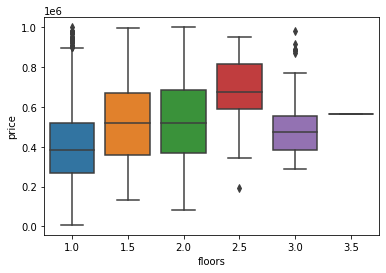

In [13]:
ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'floors',y = 'price')

In [ ]:
housing = housing.query('sqft_living < 8000 and price < 1000000 and price > 0')
housing.shape

In [14]:
housing['has_basement'] = housing['sqft_basement'].apply(
    lambda x: True if x > 0 else False)
housing.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,has_basement
0,5/2/2014 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,False
1,5/2/2014 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,True
2,5/2/2014 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,False
3,5/2/2014 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,True
4,5/2/2014 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,True
5,5/2/2014 0:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,False
6,5/2/2014 0:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA,False
7,5/2/2014 0:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA,False
8,5/2/2014 0:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA,True
9,5/2/2014 0:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA,False


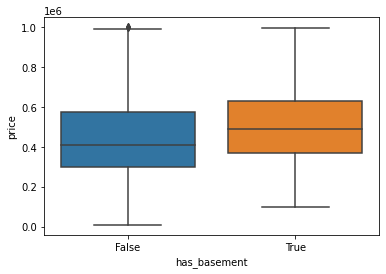

In [16]:
ax = sns.boxplot(data=housing.query('sqft_living < 8000 and price < 1000000 and price > 0'), x = 'has_basement',y = 'price', orient=h)

In [ ]:
housing.info()

In [17]:
housing = housing.drop(columns=['date','street','city','statezip','country',
                                'sqft_lot','yr_renovated','sqft_basement'])

## The Housing dataset

In [18]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         4600 non-null   float64
 1   bedrooms      4600 non-null   int64  
 2   bathrooms     4600 non-null   float64
 3   sqft_living   4600 non-null   int64  
 4   floors        4600 non-null   float64
 5   waterfront    4600 non-null   int64  
 6   view          4600 non-null   int64  
 7   condition     4600 non-null   int64  
 8   sqft_above    4600 non-null   int64  
 9   yr_built      4600 non-null   int64  
 10  has_basement  4600 non-null   bool   
dtypes: bool(1), float64(3), int64(7)
memory usage: 364.0 KB


In [19]:
housing.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
0,313000.0,3,1.50,1340,1.5,0,0,3,1340,1955,False
1,2384000.0,5,2.50,3650,2.0,0,4,5,3370,1921,True
2,342000.0,3,2.00,1930,1.0,0,0,4,1930,1966,False
3,420000.0,3,2.25,2000,1.0,0,0,4,1000,1963,True
4,550000.0,4,2.50,1940,1.0,0,0,4,1140,1976,True


## How to identify correlations with a scatterplot

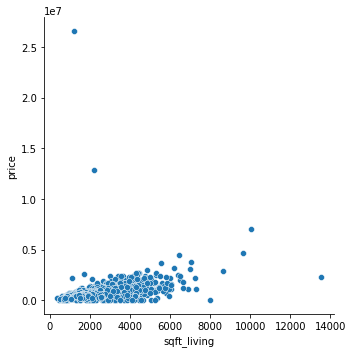

In [20]:
sns.relplot(data=housing, x='sqft_living', y='price')

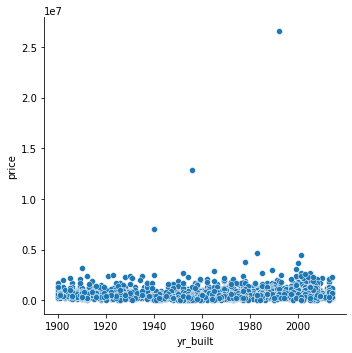

In [21]:
sns.relplot(data=housing, x='yr_built', y='price')

## How to identify correlations with a grid of scatterplots

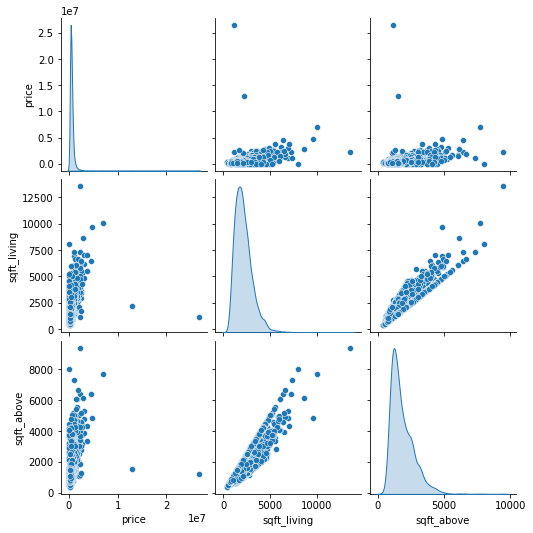

In [22]:
sns.pairplot(data=housing,
             y_vars=['price','sqft_living','sqft_above'], 
             x_vars=['price','sqft_living','sqft_above'], 
             diag_kind='kde')

## How to identify correlations with r-values

In [23]:
# r = coefficient of correlation

housing.corr().head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,yr_built,has_basement
price,1.000000,0.200336,0.327110,0.430410,0.151461,0.135648,0.228504,0.034915,0.367570,0.021857,0.110706
bedrooms,0.200336,1.000000,0.545920,0.594884,0.177895,-0.003483,0.111028,0.025080,0.484705,0.142461,0.178670
bathrooms,0.327110,0.545920,1.000000,0.761154,0.486428,0.076232,0.211960,-0.119994,0.689918,0.463498,0.161548
sqft_living,0.430410,0.594884,0.761154,1.000000,0.344850,0.117616,0.311009,-0.062826,0.876443,0.287775,0.200186
floors,0.151461,0.177895,0.486428,0.344850,1.000000,0.022024,0.031211,-0.275013,0.522814,0.467481,-0.274904


In [24]:
housing.corr()[['price']].sort_values(by='price', ascending=False)

,price
price,1.000000
sqft_living,0.430410
sqft_above,0.367570
bathrooms,0.327110
view,0.228504
bedrooms,0.200336
floors,0.151461
waterfront,0.135648
has_basement,0.110706
condition,0.034915


## How to identify correlations with a heatmap

<AxesSubplot:>

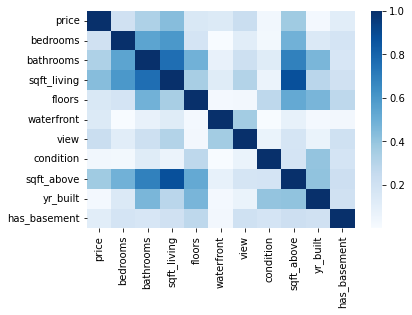

In [27]:
sns.heatmap(data=abs(housing.corr()), cmap='Blues')

<AxesSubplot:>

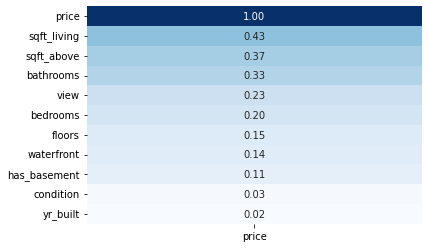

In [28]:
sns.heatmap(data=housing.corr()[['price']].sort_values(by='price', ascending=False), 
            annot=True, cmap='Blues', cbar=False, fmt=f'.2f')

## How to create, validate, and use a linear regression model

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
#r-squared = coeficient of determination
0.05**2

In [45]:
list(housing.columns)

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'yr_built',
 'has_basement']

In [65]:
housing.price.quantile(0.95)

1184050.0000000002

In [81]:
# split the data
# x - features/influencer/predictors/dependent variables
# y - target/response/label/independent variables
housing_sample = housing.query("price < 1184050")
x_train, x_test, y_train, y_test = train_test_split(
    housing_sample[[
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'yr_built',
 'has_basement']], housing_sample[['price']], 
# x_train, x_test, y_train, y_test = train_test_split(
#     housing_sample[[ 'sqft_living']], housing_sample[['price']], 
     test_size=0.33, random_state=1500)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2927, 10)
(1443, 10)
(2927, 1)
(1443, 1)


<AxesSubplot:ylabel='Density'>

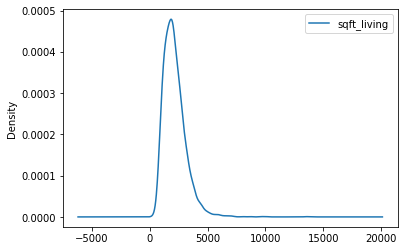

In [37]:
x_train.plot.kde()

<AxesSubplot:ylabel='Density'>

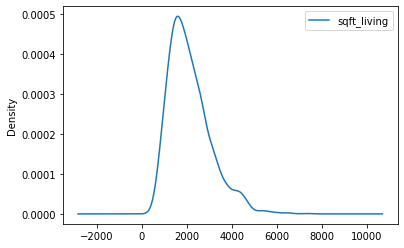

In [34]:
x_test.plot.kde()

In [82]:

# create the model from the training dataset
linearModel = LinearRegression()
linearModel.fit(x_train, y_train)

# validate the model with the test dataset
linearModel.score(x_test, y_test)
# 2 var - 0.06796236042762027
# 1 var - 0.06848429889803354
# all var - 0.07475527718481156

0.4065913538030692

In [48]:
(0.07475527718481156 - 0.06848429889803354)/0.06848429889803354

0.09156811689223694

In [51]:
# use the model to make predictions
y_predicted = linearModel.predict(x_test)
y_predicted

array([[654007.34225178],
       [847657.35337359],
       [326895.83697845],
       ...,
       [640922.88204085],
       [693260.72288458],
       [203901.91099568]])

In [52]:
# y = mx + b or target = coefficient*input + intercept
print( "price = {0} * sqft_living+ {1}".format(str(linearModel.coef_[0][0]),str(linearModel.intercept_[0])))

price = 261.6892042186655 * sqft_living+ -13300.12850581482


In [53]:
housing["price_linreg"] = 261.6892042186655 * housing["sqft_living"] -13300.12850581482

In [68]:
housing["price_predict"] = linearModel.predict(housing[['sqft_living']])

<AxesSubplot:xlabel='price_predict'>

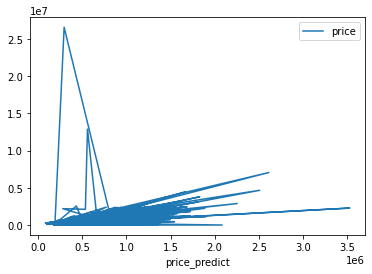

In [56]:
housing.plot(x= 'price_predict', y = "price")

In [ ]:
housing.head(5)

In [69]:
melted = pd.melt(housing, id_vars=['sqft_living'], 
                 value_vars=['price','price_predict'], 
                 var_name='price_type', value_name='price_value')
melted

,sqft_living,price_type,price_value
0,1340,price,3.130000e+05
1,3650,price,2.384000e+06
2,1930,price,3.420000e+05
3,2000,price,4.200000e+05
4,1940,price,5.500000e+05
...,...,...,...
9195,1510,price_predict,4.027632e+05
9196,1460,price_predict,3.949145e+05
9197,3010,price_predict,6.382247e+05
9198,2090,price_predict,4.938083e+05


## How to plot the predicted data

In [58]:
# put predicted values in a frame
predicted = pd.DataFrame(y_predicted, columns=['price_predicted'])

# combine the test data and the predicted data
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])

# melt price and price_predicted columns into a single column
melted = pd.melt(combined, id_vars=['sqft_living'], 
                 value_vars=['price','price_predicted'], 
                 var_name='price_type', value_name='price_value')

melted.head()

,sqft_living,price_type,price_value
0,2550,price,435000.0
1,3290,price,595000.0
2,1300,price,229950.0
3,1030,price,252500.0
4,1410,price,439900.0


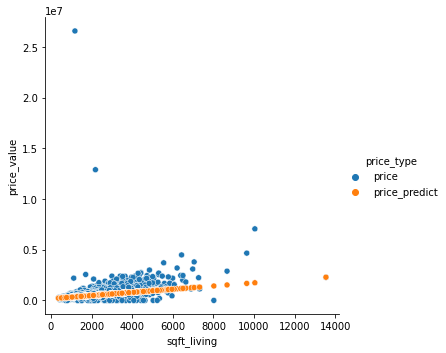

In [70]:
sns.relplot(data=melted, x='sqft_living', y='price_value', 
            hue='price_type')

## How to plot the residuals

In [71]:
combined['residual'] = combined.price - combined.price_predicted
combined.head()

,price_predicted,sqft_living,price,residual,sqft_living_bin
0,654007.342252,2550,435000.0,-219007.342252,"(2480.0, 2630.0]"
1,847657.353374,3290,595000.0,-252657.353374,"(3070.0, 3370.0]"
2,326895.836978,1300,229950.0,-96945.836978,"(1250.0, 1370.0]"
3,256239.751839,1030,252500.0,-3739.751839,"(960.0, 1127.0]"
4,355681.649443,1410,439900.0,84218.350557,"(1370.0, 1462.5]"


In [64]:
combined.residual.max()

26294506.86752779

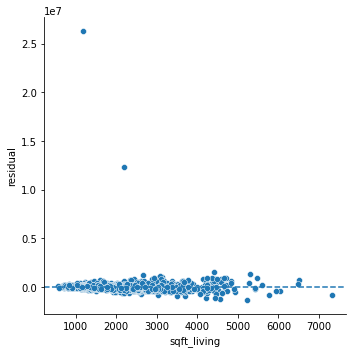

In [72]:
g = sns.relplot(data=combined, x='sqft_living', y='residual')

# draw a horizontal line where the Y axis is 0
for ax in g.axes.flat:    
    ax.axhline(0, ls='--')

<AxesSubplot:ylabel='Frequency'>

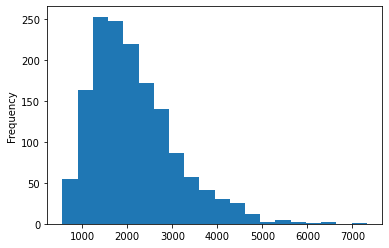

In [62]:
combined.sqft_living.plot.hist(bins=20)

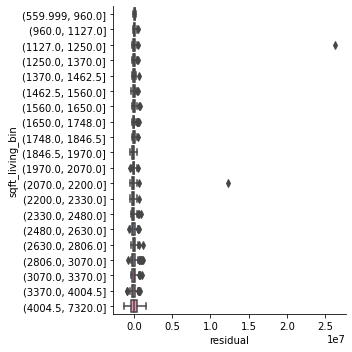

In [63]:
combined["sqft_living_bin"] = pd.qcut(combined.sqft_living, q=20)
sns.catplot(data = combined , kind='box', y="sqft_living_bin",x="residual" , orient='h')

## How to plot a linear regression

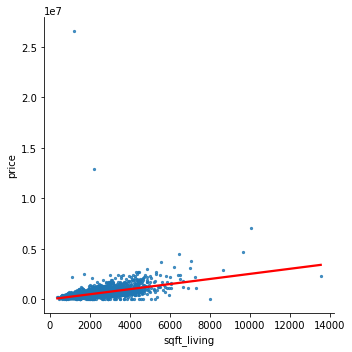

In [73]:
sns.lmplot(data=housing, x='sqft_living', y='price', ci=None,
           scatter_kws={'s':5}, line_kws={'color':'red'})

In [ ]:
!pip install statsmodels

## How to plot a logistic regression

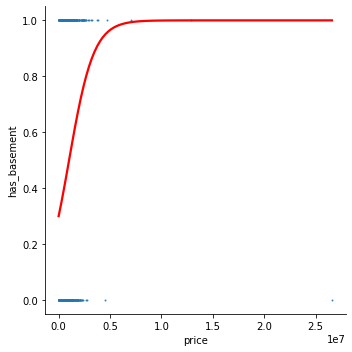

In [74]:
sns.lmplot(data=housing, x='price', y='has_basement', ci=None,
           scatter_kws={'s':1}, line_kws={'color':'red'}, 
           logistic=True)

## How to plot a polynormal regression

In [75]:
# get the data
mortality_data = pd.read_pickle('mortality_data.pkl')
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,01-04 Years,1983.8
1,1901,01-04 Years,1695.0
2,1902,01-04 Years,1655.7
3,1903,01-04 Years,1542.1
4,1904,01-04 Years,1591.5


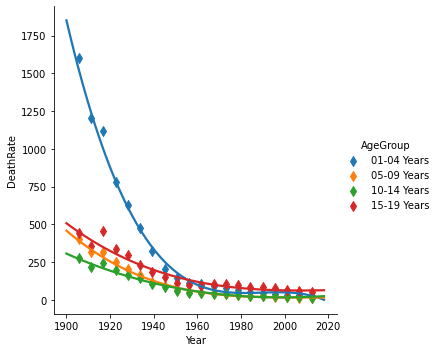

In [76]:
sns.lmplot(x='Year', y='DeathRate', hue='AgeGroup', data=mortality_data, ci=None,
           markers='d', x_bins=20, order=3)

## How to plot a lowess regression

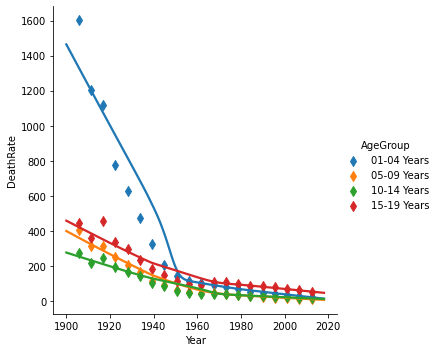

In [77]:
sns.lmplot(data=mortality_data, x='Year', y='DeathRate', hue='AgeGroup', 
           ci=None, markers='d', x_bins=20, lowess=True)

## How to plot residuals with Seaborn

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

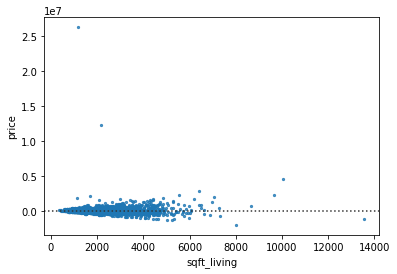

In [78]:
sns.residplot(data=housing, x='sqft_living', y='price', 
              scatter_kws={'s':5})

<AxesSubplot:xlabel='Year', ylabel='DeathRate'>

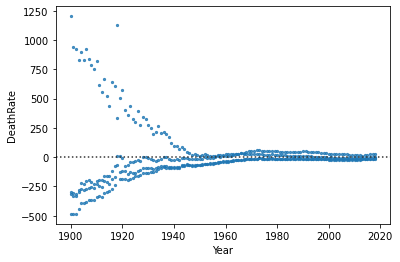

In [79]:
sns.residplot(data=mortality_data, x='Year', y='DeathRate', 
              order=3, scatter_kws={'s':5})